In [129]:
%%capture
%run final_chars_classification.ipynb



In [130]:
%run table_detector.ipynb

In [131]:
%run final_functions.ipynb

In [132]:
%run preprocessing.ipynb

In [133]:
%run get_rows_number.ipynb

In [134]:
# initialize_models(True)
load_models()

In [135]:
from tabular import tabular
import math

In [138]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img) 
        
        img = table_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        cells, col_num, row_num = box_extraction(img, False)#, table= True)

        letters = [classify(i, is_letter=True, is_table=is_table) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True, is_table=is_table) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        
        if showTrace:
            print(letters)
            print(numbers)
            print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        num_outputs = col_num-int(math.log(row_num-1,2))
        print(num_outputs)
        solver.solve(cells=numbers,num_col=col_num,num_outputs=num_outputs)

    else: 

        img = expression_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        expression_rows = get_rows_number(img)
        
        if showTrace:
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        result = [get_table(expression) for expression in expressions]
        for r in result:
            print(r)

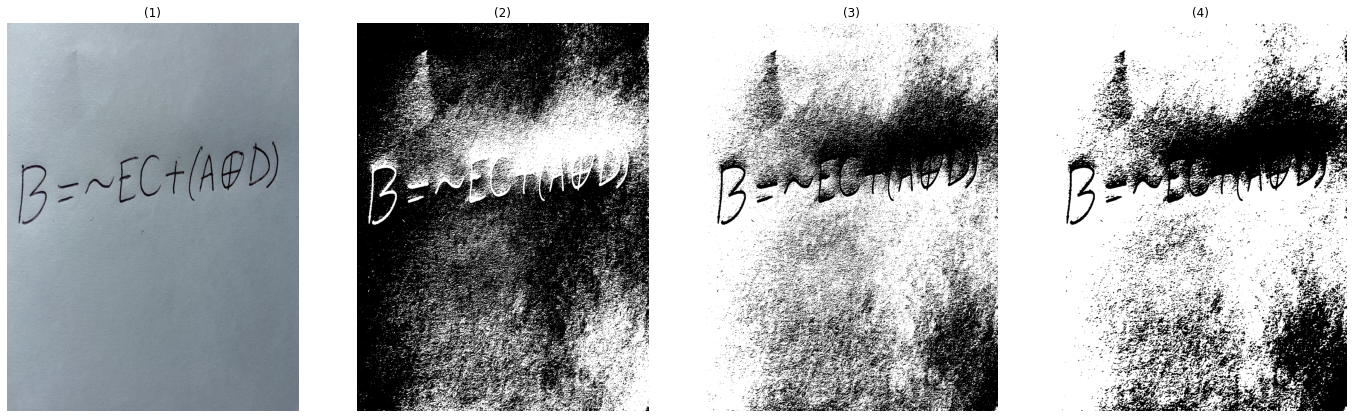

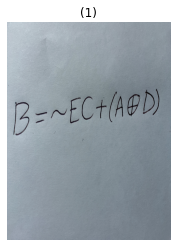

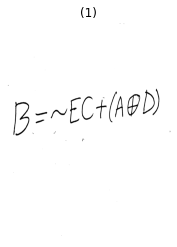

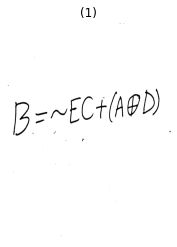

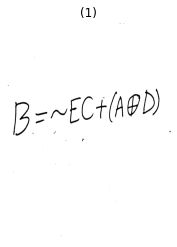

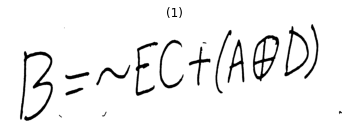

img shape: (734, 2448), max=255, min=0,median=255.0 and type uint8
tolerance: 122.4


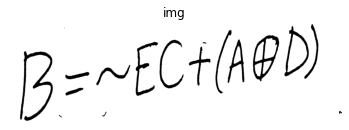

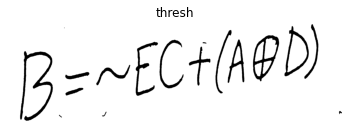

contours before area filtering
163.5, 322.5, 2994.0, 4348.0, 7062.0, -3708.0, -3448.0, 26373.0, 7502.5, -4173.5, 215.0, 13283.0, -5830.5, 10361.5, 14639.0, -10279.0, 42272.0, -24285.0, 7083.5, 19.5, 37726.5, 6765.5, -1793351.0, 
average_area 38664.6875
max_width 250
max_height 508
contours after area filtering
122428, 9612, 37750, 64616, 62835, 45600, 55097, 39114, 64512, 65693, 41496, 
masks


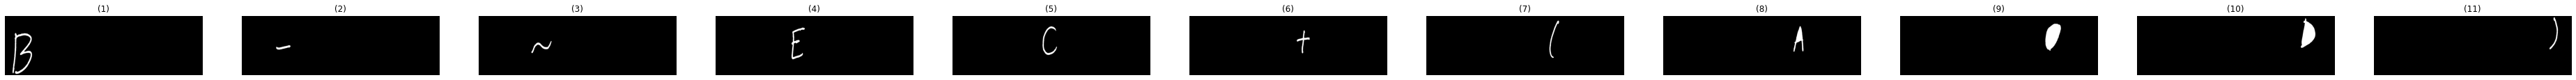

contours after merging


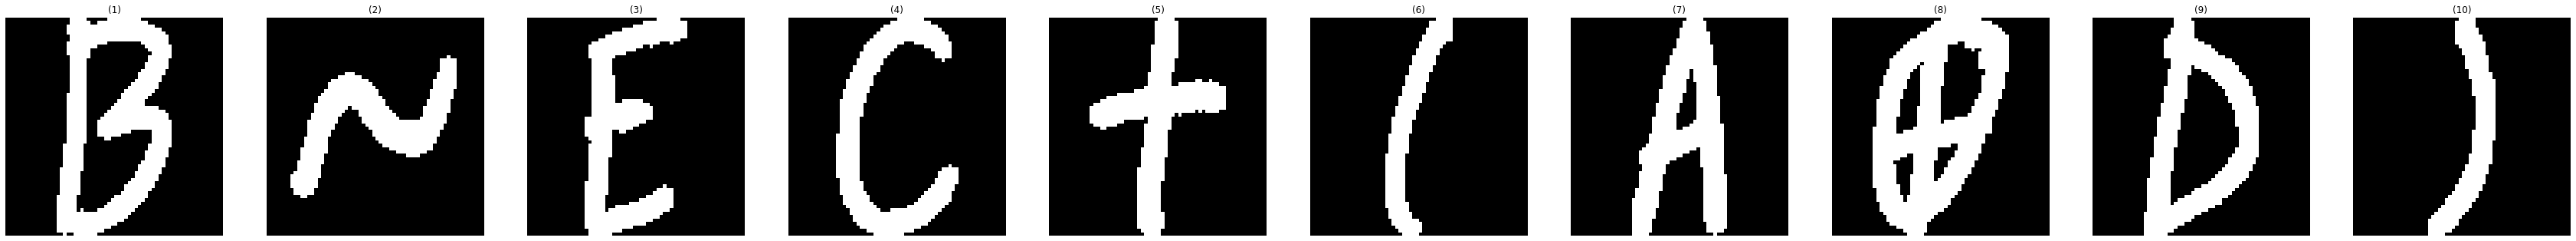

[array(['B', '~', 'E', 'C', '+', '(', 'A', 'B', 'D', ')'], dtype='<U7')]
['B' '=' 'E' 'C' '+' '(' 'A' 'B' 'D' ')']
E and C or ( A and B and D ) 
+-----+-----+-----+-----+-----+---------------------------------+
|  E  |  B  |  C  |  A  |  D  |  E and C or ( A and B and D )   |
|-----+-----+-----+-----+-----+---------------------------------|
|  1  |  1  |  1  |  1  |  1  |                1                |
|  1  |  1  |  1  |  1  |  0  |                1                |
|  1  |  1  |  1  |  0  |  1  |                1                |
|  1  |  1  |  1  |  0  |  0  |                1                |
|  1  |  1  |  0  |  1  |  1  |                1                |
|  1  |  1  |  0  |  1  |  0  |                0                |
|  1  |  1  |  0  |  0  |  1  |                0                |
|  1  |  1  |  0  |  0  |  0  |                0                |
|  1  |  0  |  1  |  1  |  1  |                1                |
|  1  |  0  |  1  |  1  |  0  |                1               

In [139]:
image = cv2.imread("./test_images/ex1.jpg")

result = solve_expression(image, is_table=False, showTrace=True)


